In [151]:
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
import mne

In [152]:
def load_and_epoching(subject_id, before_or_after, minus_t, to_t):
    raw_path = os.path.join('../../data', str(subject_id), 'repaired_'+before_or_after+'.fif')
    raw = mne.io.read_raw_fif(raw_path, preload=True)

    # detect events
    ch_names = raw.info['ch_names']
    ch_types = ['misc'] + ['eeg'] * 32 + ['misc'] + ['stim'] * 21
    stim_channel_names = [ch_name for ch_name, ch_type in zip(ch_names, ch_types) if ch_type == 'stim']
    events = np.array([], dtype=int).reshape(0, 3)  # Create an empty events array with 3 columns

    for idx, stim_channel_name in enumerate(stim_channel_names):
        single_event = mne.find_events(raw, stim_channel=stim_channel_name, min_duration=1/raw.info['sfreq'])
        # Update the event id in single_event (the third column) to be idx + 1
        single_event[:, 2] = idx + 1
        # Concatenate single_event to the events array
        events = np.vstack([events, single_event])

    event_dict = {stim_channel_name: idx + 1 for idx, stim_channel_name in enumerate(stim_channel_names)}

    # epoching
    epochs = mne.Epochs(raw, events, event_id=10, tmin=minus_t, tmax=to_t, baseline=(0,0), preload=True)
    return epochs


# Function to calculate the PSD for each subject
def calculate_subject_psd(subject_ids, before_or_after, fmin, fmax):
    psds = []
    for subject_id in subject_ids:
        epochs = load_and_epoching(subject_id, before_or_after, 0, 1)
        psd = epochs.compute_psd(method='multitaper',fmin=fmin, fmax=fmax)# .plot(average=True)
        psds.append(psd)
    return psds

In [153]:
file_path = os.path.join('..', '..', 'data', 'experiment.csv')
df = pd.read_csv(file_path)

real_subject_ids = df.loc[df['Real stimulation'] == 1, 'subject id'].values
sham_subject_ids = df.loc[df['Real stimulation'] == 0, 'subject id'].values

In [154]:
# Calculate the PSDs for the real and sham groups, before and after stimulation
fmin = 30
fmax = 50
freqs = np.linspace(30.97, 49.96, 20)

real_before_psds = calculate_subject_psd(real_subject_ids, 'before', fmin = fmin, fmax = fmax)
real_after_psds = calculate_subject_psd(real_subject_ids, 'after', fmin = fmin, fmax = fmax)

sham_before_psds = calculate_subject_psd(sham_subject_ids, 'before', fmin = fmin, fmax = fmax)
sham_after_psds = calculate_subject_psd(sham_subject_ids, 'after', fmin = fmin, fmax = fmax)

Opening raw data file ../../data/1/repaired_before.fif...
    Range : 0 ... 647763 =      0.000 ...   539.803 secs
Ready.
Reading 0 ... 647763  =      0.000 ...   539.803 secs...


/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/1/repaired_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
119 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/3/repaired_before.fif...
    Range 

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/3/repaired_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
119 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/4/repaired_before.fif...
    Range 

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/4/repaired_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
112 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/5/repaired_before.fif...
    Range 

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/5/repaired_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
107 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/1/repaired_after.fif...
    Range :

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/1/repaired_after.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
116 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/3/repaired_after.fif...
    Range :

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/3/repaired_after.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
119 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/4/repaired_after.fif...
    Range :

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/4/repaired_after.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
104 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/5/repaired_after.fif...
    Range :

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/5/repaired_after.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
113 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/2/repaired_before.fif...
    Range 

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/2/repaired_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
116 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/6/repaired_before.fif...
    Range 

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/6/repaired_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
119 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/7/repaired_before.fif...
    Range 

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/7/repaired_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
119 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/8/repaired_before.fif...
    Range 

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/8/repaired_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
119 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/2/repaired_after.fif...
    Range :

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/2/repaired_after.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
117 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/6/repaired_after.fif...
    Range :

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/6/repaired_after.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
119 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/7/repaired_after.fif...
    Range :

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/7/repaired_after.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
119 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file ../../data/8/repaired_after.fif...
    Range :

/var/folders/bj/ssk5bqjx2cv89z076k2dg5hm0000gn/T/ipykernel_29471/870533389.py:3: RuntimeWarning: This filename (../../data/8/repaired_after.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
117 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


In [155]:
sham_before_psds[1].shape

(120, 32, 20)

In [156]:
sham_after_psds[3]

Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Epochs
Number of epochs,120
Dims,"epoch, channel, freq"
Estimation method,multitaper
Number of channels,32
Number of frequency bins,20
Frequency range,30.97 – 49.96 Hz


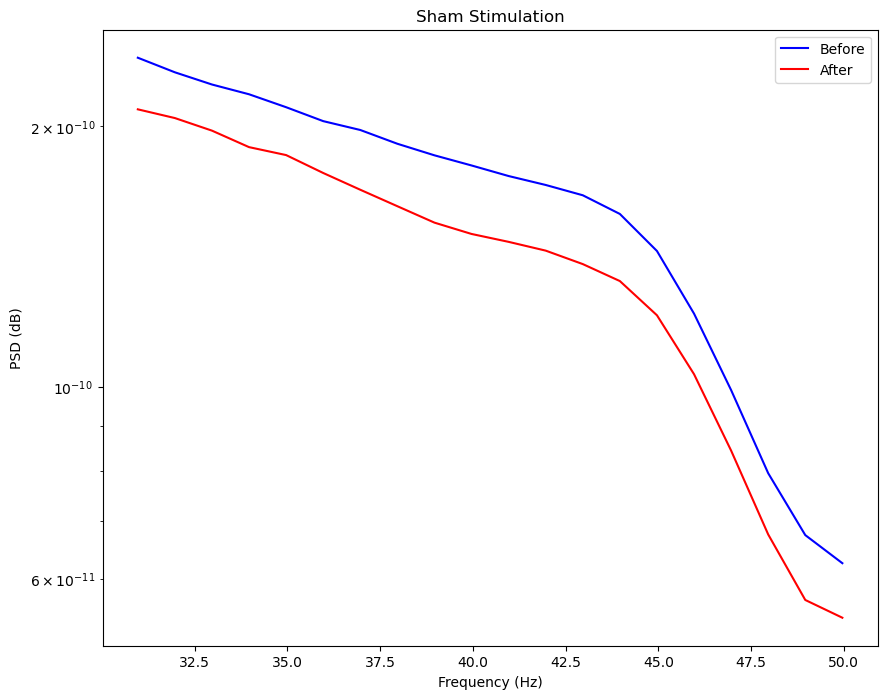

In [159]:
# Calculate the mean and standard deviation for sham group
# from(4,120,32,50) to (1,50)
sham_before_mean = np.mean(sham_before_psds, axis=(0, 1, 2))
sham_before_std = np.std(sham_before_psds, axis=(0, 1, 2))

sham_after_mean = np.mean(sham_after_psds, axis=(0, 1, 2))
sham_after_std = np.std(sham_after_psds, axis=(0, 1, 2))

# Plot the PSDs for sham group
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the mean PSD for sham before
ax.semilogy(freqs, sham_before_mean, label='Before', color='blue')
# ax.fill_between(freqs, sham_before_mean - sham_before_std, sham_before_mean + sham_before_std,
#                 alpha=0.2, color='blue')

# Plot the mean PSD for sham after
ax.semilogy(freqs, sham_after_mean, label='After', color='red')
# ax.fill_between(freqs, sham_after_mean - sham_after_std, sham_after_mean + sham_after_std,
#                 alpha=0.2, color='red')

ax.set_title('Sham Stimulation')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('PSD (dB)')
ax.legend()

plt.show()

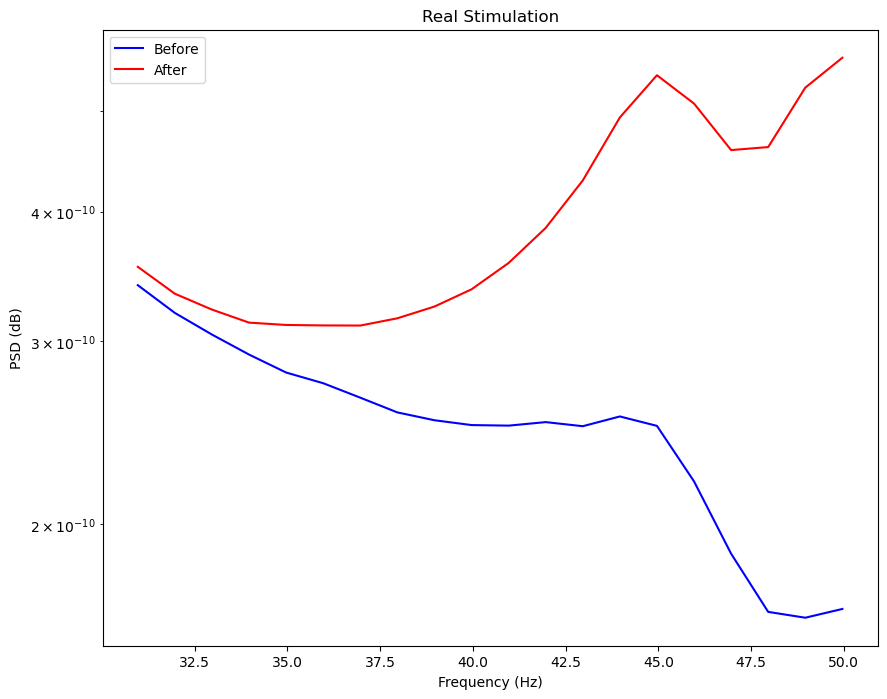

In [160]:
# Calculate the mean and standard deviation for sham group
# from(4,120,32,50) to (1,50)
real_before_mean = np.mean(real_before_psds, axis=(0, 1, 2))
real_before_std = np.std(real_before_psds, axis=(0, 1, 2))

real_after_mean = np.mean(real_after_psds, axis=(0, 1, 2))
real_after_std = np.std(real_after_psds, axis=(0, 1, 2))

# Plot the PSDs for sham group
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the mean PSD for sham before
ax.semilogy(freqs, real_before_mean, label='Before', color='blue')
# ax.fill_between(freqs, real_before_mean - real_before_std, real_before_mean + real_before_std,
#                 alpha=0.2, color='blue')

# Plot the mean PSD for sham after
ax.semilogy(freqs, real_after_mean, label='After', color='red')
# ax.fill_between(freqs, real_after_mean - real_after_std, real_after_mean + real_after_std,
#                 alpha=0.2, color='red')

ax.set_title('Real Stimulation')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('PSD (dB)')
ax.legend()

plt.show()